In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd

df = pd.read_csv('merged_df.csv')
df.head()

,price_per_sqft,location,num_res_price_lv_3,num_res_price_lv_4,Starbucks,Whole Foods,Movie Theater,Equinox
0,225.000000,"(40.761255, -73.9744834)",8,0,10,0,4,2
1,11114.277572,"(40.7663935, -73.9809909)",5,0,8,1,2,1
2,129.032258,"(40.5418051, -74.1961086)",0,0,0,0,0,0
3,155.056180,"(40.7613979, -73.9746128)",8,0,10,0,4,2
4,155.056180,"(40.7613979, -73.9746128)",8,0,10,0,4,2


Index(['num_res_price_lv_3', 'num_res_price_lv_4', 'Starbucks', 'Whole Foods',
       'Movie Theater', 'Equinox'],
      dtype='object')


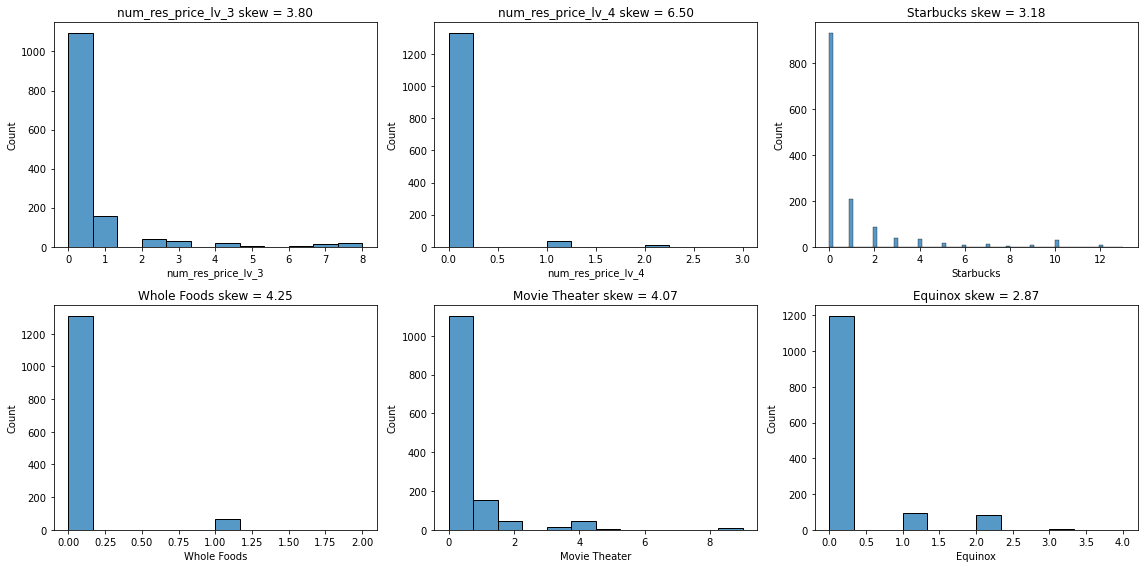

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = df.columns[2:]
print(cols)

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(16,8))

for i, col in enumerate(cols):
    row_index = i // 3
    col_index = i % 3
    ax = axs[row_index, col_index]

    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)

    skew = df[col].skew()
    ax.set_title(f'{col} skewness = {skew:.2f}')

plt.tight_layout()
plt.show()

In [20]:
import numpy as np
df['num_res_price_lv_3_4'] = df['num_res_price_lv_3']+df['num_res_price_lv_4']
df.head()

,price_per_sqft,location,num_res_price_lv_3,num_res_price_lv_4,Starbucks,Whole Foods,Movie Theater,Equinox,num_res_price_lv_3_4
0,225.000000,"(40.761255, -73.9744834)",8,0,10,0,4,2,8
1,11114.277572,"(40.7663935, -73.9809909)",5,0,8,1,2,1,5
2,129.032258,"(40.5418051, -74.1961086)",0,0,0,0,0,0,0
3,155.056180,"(40.7613979, -73.9746128)",8,0,10,0,4,2,8
4,155.056180,"(40.7613979, -73.9746128)",8,0,10,0,4,2,8


In [21]:
df = df.drop(['num_res_price_lv_3','num_res_price_lv_4'], axis=1)
df.head()

,price_per_sqft,location,Starbucks,Whole Foods,Movie Theater,Equinox,num_res_price_lv_3_4
0,225.000000,"(40.761255, -73.9744834)",10,0,4,2,8
1,11114.277572,"(40.7663935, -73.9809909)",8,1,2,1,5
2,129.032258,"(40.5418051, -74.1961086)",0,0,0,0,0
3,155.056180,"(40.7613979, -73.9746128)",10,0,4,2,8
4,155.056180,"(40.7613979, -73.9746128)",10,0,4,2,8


In [22]:
df_log = df.iloc[:,2:].apply(lambda x : np.log(x+1))
df_log.head()

,Starbucks,Whole Foods,Movie Theater,Equinox,num_res_price_lv_3_4
0,2.397895,0.000000,1.609438,1.098612,2.197225
1,2.197225,0.693147,1.098612,0.693147,1.791759
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.397895,0.000000,1.609438,1.098612,2.197225
4,2.397895,0.000000,1.609438,1.098612,2.197225


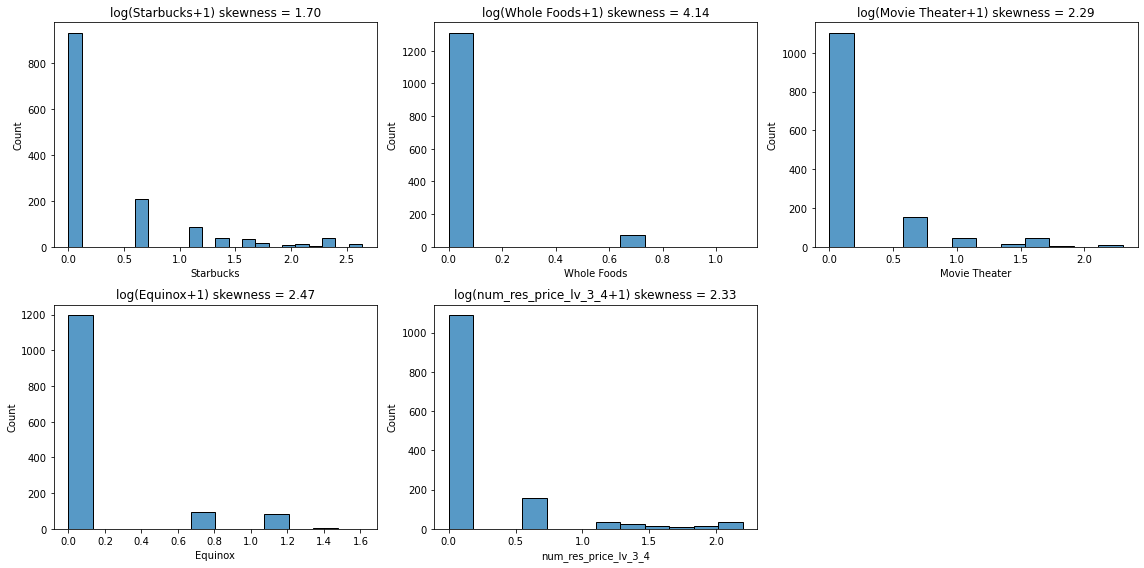

In [27]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(16,8))

for i, col in enumerate(df_log.columns):
    row_index = i // 3
    col_index = i % 3
    ax = axs[row_index, col_index]

    sns.histplot(data=df_log, x=col, ax=ax)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)

    skew = df_log[col].skew()
    ax.set_title(f'log({col}+1) skewness = {skew:.2f}')

fig.delaxes(axs[1][2])
plt.tight_layout()
plt.show()

In [28]:
df_log['price_per_sqft'] = df['price_per_sqft']
df_log.head()

,Starbucks,Whole Foods,Movie Theater,Equinox,num_res_price_lv_3_4,price_per_sqft
0,2.397895,0.000000,1.609438,1.098612,2.197225,225.000000
1,2.197225,0.693147,1.098612,0.693147,1.791759,11114.277572
2,0.000000,0.000000,0.000000,0.000000,0.000000,129.032258
3,2.397895,0.000000,1.609438,1.098612,2.197225,155.056180
4,2.397895,0.000000,1.609438,1.098612,2.197225,155.056180


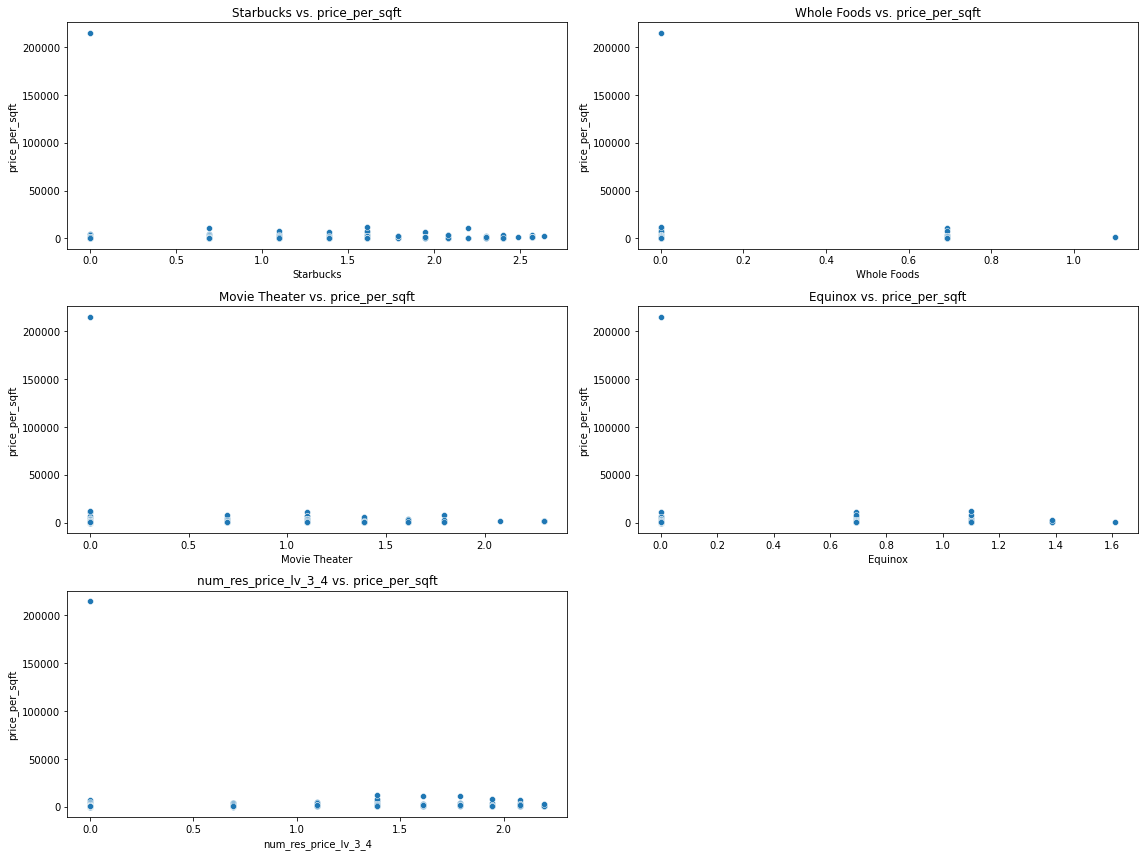

In [31]:
# See whether the relationship between the predictors and the target is linear to decide whether to add polynomial features
features = df_log.columns[:-1]
target = df_log.columns[-1]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16,12))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=df_log, x=feature, y=target, ax=axs[i])
    axs[i].set_title(f'{feature} vs. {target}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(target)

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

In [35]:
# one outlier really stands out
df[df['price_per_sqft'] > 200000]

,price_per_sqft,location,Starbucks,Whole Foods,Movie Theater,Equinox,num_res_price_lv_3_4
505,214748.3647,"(40.5184841, -74.2244185)",0,0,0,0,0


In [37]:
df = df[df['price_per_sqft'] < 200000]
df_log = df_log[df_log['price_per_sqft'] < 200000]

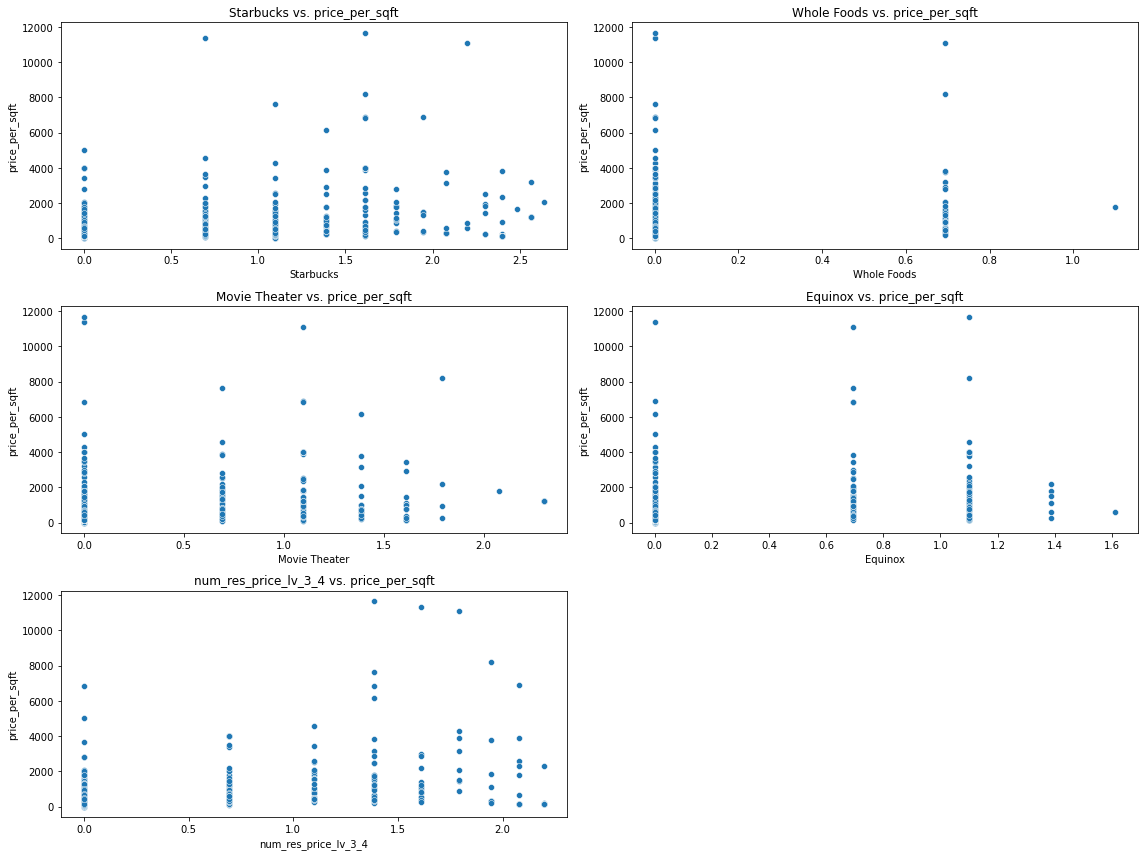

In [38]:
features = df_log.columns[:-1]
target = df_log.columns[-1]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16,12))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=df_log, x=feature, y=target, ax=axs[i])
    axs[i].set_title(f'{feature} vs. {target}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(target)

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

Even we do log transformation, it doesn't make the relationship linear, but rather more complex, so I'll continue doing analysis with the original dataset.

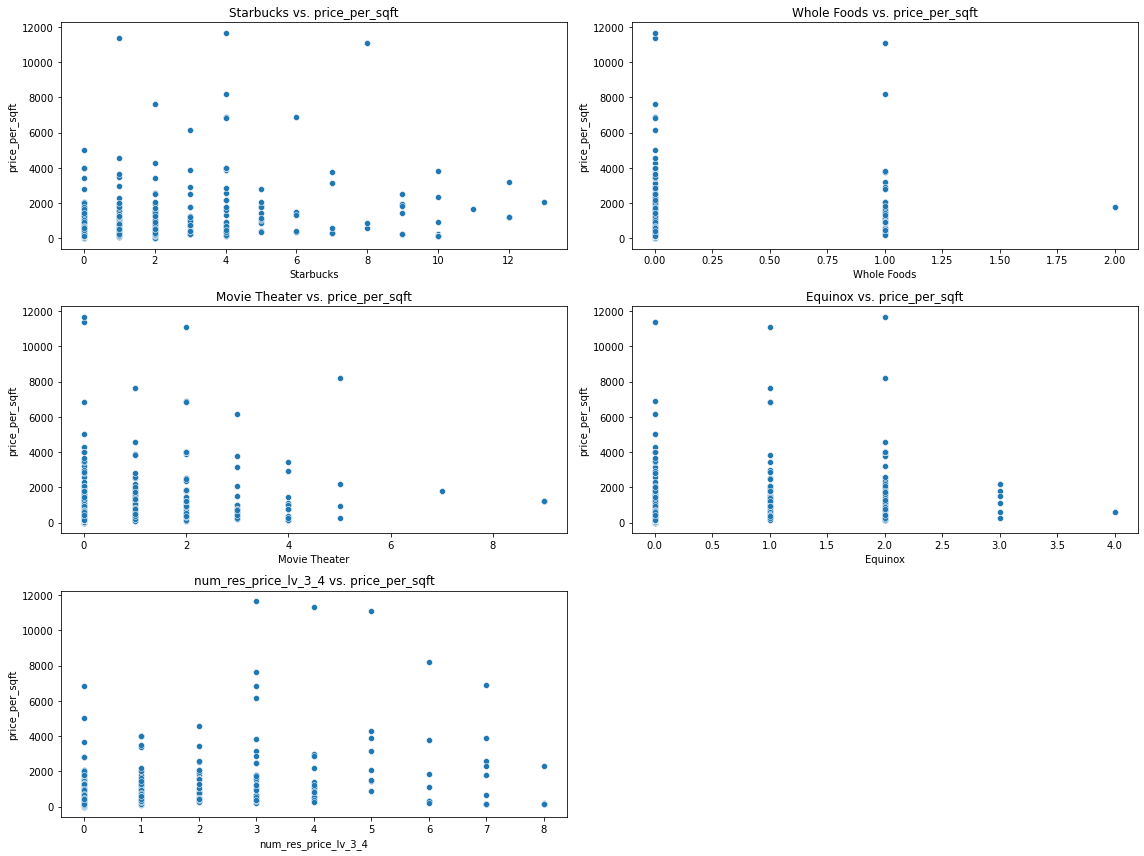

In [41]:
features = df.columns[2:]
target = df.columns[0]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16,12))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y=target, ax=axs[i])
    axs[i].set_title(f'{feature} vs. {target}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(target)

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['location', 'price_per_sqft'], axis=1)
y = df['price_per_sqft']

In [45]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[10.,  0.,  4., ...,  4., 16., 64.],
       [ 8.,  1.,  2., ...,  1.,  5., 25.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 3.,  0.,  0., ...,  0.,  0.,  0.]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.2, random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 272039.27231481933
R^2 Score: 0.39180004531438406


It makes sense to have this low R^2 value as we don't have enough numerical predictors that correlates to the property prices, next step would try clusters